In [2]:
from pynytimes import NYTAPI

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
nyt = NYTAPI("fillinkey", parse_dates=True)

In [7]:
# Get best sellers lists from other date
import datetime

books = nyt.best_sellers_list(
    name = "combined-print-and-e-book-fiction",
    date = datetime.datetime(2022, 2, 13 )
)

In [ ]:
# how would I extract the title, and then # of weeks on the list, and then put into a separate dataframe, and make a chart?
#this function helps break it up, but I loose certain columns like title and Author

In [8]:
df = pd.DataFrame.from_dict(books)

In [16]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

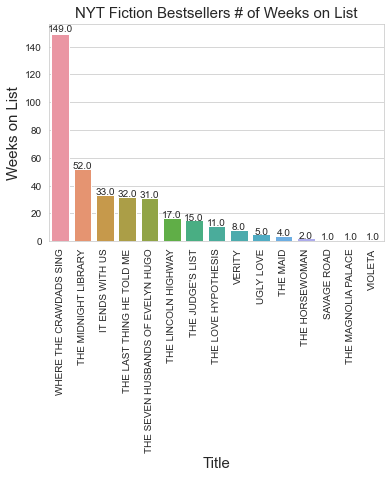

In [17]:
sns.set_style("whitegrid")

best_sellers_chart = sns.barplot(x='title',y ='weeks_on_list', data=df, order = df.sort_values('weeks_on_list', ascending = False).title)
best_sellers_chart.set_xticklabels(best_sellers_chart.get_xticklabels(),rotation = 90)
plt.xlabel("Title", size = 15)
plt.ylabel("Weeks on List", size = 15)
plt.title("NYT Fiction Bestsellers # of Weeks on List", size = 15)
show_values(best_sellers_chart)


